<a href="https://colab.research.google.com/github/FreyMiggen/Image-Processing/blob/main/Bilateral_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from PIL import Image
import numpy as np
import math
import os
import gdown


You can upload your own image here to test or you could run the cell below to download a image that I host from my Google Drive. This is a grayscale image.

In [ ]:
!gdown  https://drive.google.com/uc?id=1UletTFcL7DGC4tYeZsp0X3X0L35j4muP -O 'sample_data/baby.jpg'
root='/content/sample_data'
path=os.path.join(root,"baby.jpg")
img=Image.open(path)
np_img=np.asarray(img)

In [6]:
np_img.shape

(464, 600)

In [7]:
def padding(img,filter_size):
    h,w=filter_size
    pad_h=math.floor(h/2)
    pad_w=math.floor(w/2)
    img=np.vstack([img,np.zeros((pad_h,img.shape[1]))])
    img=np.vstack([np.zeros((pad_h,img.shape[1])),img])

    img=np.hstack([img,np.zeros((img.shape[0],pad_w))])
    img=np.hstack([np.zeros((img.shape[0],pad_w)),img])

    return img

def help(m,n):
    
    filter=np.zeros((m*2+1,n*2+1,2))
    center_h=m
    center_w=n
    for i in range(-m,m+1):
        for j in range(-n,n+1):
            filter[center_h-i][center_w-j]=[i,j]
    return np.array(filter)
          
def compute_smoothing(m,n,ns,nb,target_position,img):
    i,j=target_position
    filter=help(m,n)
    filter_1=filter[:,:,0]
    filter_2=filter[:,:,1]
    spatial_1=np.square(filter_1)*(-0.5)*(1/ns**2)
    spatial_2=np.square(filter_2)*(-0.5)*(1/ns**2)
    spatial=spatial_1+spatial_2
    spatial=np.exp(spatial)/(2*math.pi*nb**2)
    #print("spatial size",spatial.shape)
    brightness=np.copy(img[i-m:i+m+1,j-n:j+n+1])-img[i][j]
    #print("brightness size",brightness.shape)
    brightness=np.square(brightness)*(-0.5)*(1/nb**2)
    brightness=np.exp(brightness)/(math.sqrt(2*math.pi)*nb)

    
    bilateral=brightness*spatial
    w_sb=np.sum(bilateral)
    bilateral=bilateral/w_sb

    temp=np.copy(img[i-m:i+m+1,j-n:j+n+1])
    re=np.sum(temp*bilateral)
    return re

def bilateral_filter(ns,nb,img,filter_size):
    end_h=img.shape[0]-math.floor(filter_size[0]/2)
    start_h=math.floor(filter_size[0]/2)

    start_w=math.floor(filter_size[1]/2)
    end_w=img.shape[1]-math.floor(filter_size[1]/2)

    #m,n indicate the size of the filter
    m=math.floor(filter_size[0]/2)
    n=math.floor(filter_size[1]/2)
    for i in range(start_h,end_h):
        for j in range(start_w,end_w):
            img[i][j]=compute_smoothing(m,n,ns,nb,(i,j),img)
    return img

###########for 3 channel color image##########################
# pre_img_b=np_img[:,:,0]/255
# pre_img_g=np_img[:,:,1]/255
# pre_img_r=np_img[:,:,2]/255
# padded_img_b=padding(pre_img_b,(3,3))
# padded_img_g=padding(pre_img_g,(3,3))
# padded_img_r=padding(pre_img_r,(3,3))
# processed_img_b=bilateral_filter(2,3,padded_img_b,(3,3))
# processed_img_g=bilateral_filter(2,3,padded_img_g,(3,3))
# processed_img_r=bilateral_filter(2,3,padded_img_r,(3,3))

# processed_img=np.zeros((processed_img_b.shape[0],processed_img_b.shape[0],3))
# processed_img[:,:,0]=processed_img_b
# processed_img[:,:,1]=processed_img_g
# processed_img[:,:,2]=processed_img_r

################for grayscale image #########################
pre_img=np_img/255
padded_img=padding(pre_img,(5,5))
processed_img=bilateral_filter(2,3,padded_img,(5,5))



In [ ]:
#cv.imshow("pad image",padded_img/255)
cv.imshow('original',np_img)
cv.imshow('test',processed_img)
cv.waitKey(0)

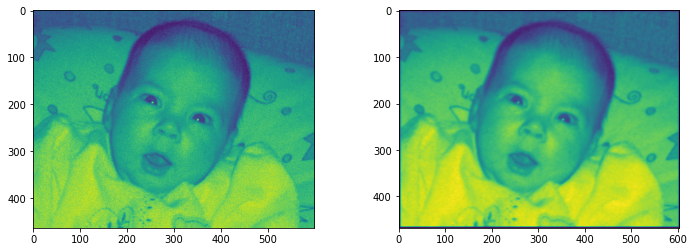

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(np_img)
plt.subplot(1,2,2)
plt.imshow(processed_img)

In [19]:
processed=processed_img*255
processed=Image.fromarray(processed)
processed=processed.convert('RGB')
processed.save('/content/sample_data/baby_bilateral_filter.jpg')